In [14]:
from IPython.display import display, IFrame, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy             as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib          import rc 
from matplotlib          import cm

import pandas as pd
import corner

import os
import os.path as path
import wget

from tqdm import tqdm

import scipy.optimize as spo

In [4]:
if not path.exists('Data'):
    os.mkdir('Data')


file = 'Data/Rotacion.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/DataRotacion.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

In [192]:
data = pd.read_csv(Path_)

hi = data.h
ai = data.angle
yi = data.y
sigmay = data.sigmay

len(yi)

60

In [112]:
data1 = data[data['angle'] == 30]
H = data1.h
A = data1.angle
Y = data1.y
sigma = data1.sigmay

data1

,h,angle,y,sigmay
20,10.0,30.0,0.0013,0.0015
21,20.0,30.0,0.0017,0.0015
22,30.0,30.0,0.0038,0.0015
23,40.0,30.0,0.0059,0.0015
24,50.0,30.0,0.0067,0.0015
25,60.0,30.0,0.0094,0.0015
26,70.0,30.0,0.0122,0.0015
27,80.0,30.0,0.0132,0.0015
28,90.0,30.0,0.0151,0.0015
29,100.0,30.0,0.0186,0.0015


In [118]:
def Model(h,o,a,g):
    #a es lambda
    yi = 2*np.sqrt(2)*o*np.cos(a*np.pi/180)*np.sqrt((h**3)/g)/3
    return yi

In [151]:
def Chi2(o,h,yi,sigmai,a,g):
    return np.sum (  (yi-Model(h,o,a,g))**2/(2*sigmai**2) )

len(H),len(Y),len(sigma),len(A)

(10, 10, 10, 10)

In [156]:
nll = lambda *o: Chi2(*o)

sigma1 = np.random.normal(loc=0,scale=20,size=len(Y))
sigma1 = np.abs(sigma)

PEO=np.ones(10)
minimm = spo.minimize( nll, PEO, args=(H,Y,sigma,A,9.8),options={'disp':True} )

bestparam = minimm.x
bestparam
#Se escogió el mejor valor de omega, que es 7.07215657e-05 como se ve en la optimización abajo.

Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 15
         Function evaluations: 275
         Gradient evaluations: 25


array([1.57609173e-04, 7.28648693e-05, 8.86592161e-05, 8.94096724e-05,
       7.26497170e-05, 7.75385931e-05, 7.98602972e-05, 7.07215657e-05,
       6.77991310e-05, 7.13060264e-05])

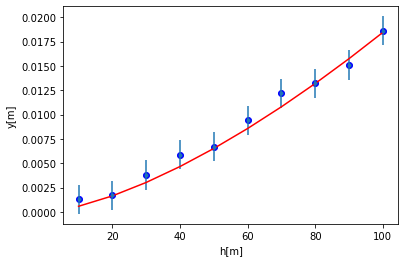

In [157]:
plt.plot(H,Model(H,7.07215657e-05,A,9.8),color='r')
plt.xlabel('h[m]')
plt.ylabel('y[m]')

plt.errorbar(H,Y,yerr=sigma1,fmt='.')
plt.scatter(H,Y,color='blue')
plt.show()

In [195]:
Gravedad=np.zeros(300)
Omega = np.zeros(300)
for i in range(300):
    Gravedad[i]=9.81 + np.random.normal(loc=0,scale=1)
    for j in range(len(yi)):
        y_cambiado=yi[j]+np.random.normal( loc=0, scale=sigmay[0], size=len(yi) )
        nll = lambda *o: Chi2(*o)
        PEO=np.ones(60)
        mini = spo.minimize( nll, PEO, args=(hi,y_cambiado,sigmay,ai,Gravedad[i]),options={'disp':True} )
    
        bp = mini.x[5]
        Omega[i] = bp

Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 67
         Function evaluations: 5124
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 67
         Function evaluations: 5124
         Gradient evaluations: 84
         Current function value: 0.000012
         Iterations: 65
         Function evaluations: 7271
         Gradient evaluations: 119
         Current function value: 0.000012
         Iterations: 65
         Function evaluations: 6966
         Gradient evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 67
         Function evaluations: 5124
         Gradient evaluations: 84
         Current function value: 0.000012
         Iterations: 65
         Function evaluations: 6295
         Gradient evaluations: 103
         Current function value: 0.000012
         Iterations: 66
 

         Current function value: 0.000012
         Iterations: 65
         Function evaluations: 7027
         Gradient evaluations: 115
         Current function value: 0.000012
         Iterations: 65
         Function evaluations: 8186
         Gradient evaluations: 134
         Current function value: 0.000012
         Iterations: 66
         Function evaluations: 6478
         Gradient evaluations: 106
         Current function value: 0.000012
         Iterations: 65
         Function evaluations: 6783
         Gradient evaluations: 111
         Current function value: 0.000012
         Iterations: 65
         Function evaluations: 7088
         Gradient evaluations: 116
         Current function value: 0.000012
         Iterations: 65
         Function evaluations: 7454
         Gradient evaluations: 122
         Current function value: 0.000012
         Iterations: 65
         Function evaluations: 7759
         Gradient evaluations: 127
         Current function value: 0.000012

Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 67
         Function evaluations: 5124
         Gradient evaluations: 84
         Current function value: 0.000011
         Iterations: 65
         Function evaluations: 7210
         Gradient evaluations: 118
         Current function value: 0.000011
         Iterations: 67
         Function evaluations: 7636
         Gradient evaluations: 125
         Current function value: 0.000011
         Iterations: 65
         Function evaluations: 6905
         Gradient evaluations: 113
Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 67
         Function evaluations: 5124
         Gradient evaluations: 84
         Current function value: 0.000011
         Iterations: 66
         Function evaluations: 7942
         Gradient evaluations: 130
Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 67


KeyboardInterrupt: 

In [188]:
P2 = np.ones(len(yi))
minimmi = spo.minimize( nll, P2, args=(hi,yi,sigmay,ai,9.8),options={'disp':True} )

bestparami = minimmi.x

         Current function value: 0.000013
         Iterations: 65
         Function evaluations: 7881
         Gradient evaluations: 129


<ipython-input-194-c090bf0ddf27>:2: UserWarning: The following kwargs were not used by contour: 'aspect'
  plt.contourf(H2,aspect = 'auto', extent = (Omega.min(),Omega.max(),Gravedad.min(),Gravedad.max()))


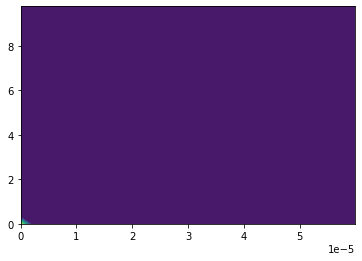

In [194]:
H2,binsx,binsy = np.histogram2d(Omega,Gravedad,bins=(30,30))
plt.contourf(H2,aspect = 'auto', extent = (Omega.min(),Omega.max(),Gravedad.min(),Gravedad.max()))